# UNCHR - ML Challenge
Jamie Hackney, Mihir Singh, Jake Gilbert

## Abstract
This project seeks to develop, implement, and evaluate various machine learning models to accurately predict the severity of refugee displacement in Somalia as part of the United Nation's Commissioner for Refugees's (UNHCR) machine learning challenge. Data used by our models' was collected by the UNHCR between 2015 and 2024 in Somalia. It contained information on people movement, markets, health, conflicts, and climate. We developed a web scraper to collect this data and combine it all into a single dataframe. We then chose to either impute the data or dropping NaN values before running various models trained on some or all of the features before evaluating how accurately they could predict the severity of refugee arrivals into a specific district in Somalia. We found that our model did poorly when the challenge was framed as a regression problem, but performed significantly better when we ran a regression and binned the data based on UN refugee magnitude categories before evaluating the accuracy of the model. We then determined that our pure regression model probably performed worse because of the presence of significant outliers in the data that ended up skewing traditional evaluation metrics for regression models like R squared or root mean squared error. Ultimately, we found that a decision tree classifier trained on all features of the data except the target feature of refugee arrivals was extremely effective at predicting the severity of displacement in specific regions in Somalia, garnering an accuracy of 99.5%.

## Introduction
Our program addresses the humanitarian crisis in Somalia related to refugee movements and forcibly displaced people. The ability to accurately predict patterns in forcibly displaced peoples movements is crucial to the development of public policies that provide aid and resources to refugees. This is not a novel problem, and in fact has been approached several times before. Suleimenova et al., Gulden et al., and Lin et al., all developed agent based models to predict population movements. Gleick investigated the relationship between water and conflict in Syria, drawing a connection between water scarcity and conflicts, which in turn can drive population movements. Finally, Finnley noted an increase in migration of women and children during the severe drought of 1983-1985. 

We focused on building models trained on a variety of data, including climate, conflicts, and market prices. By looking at a variety of conditions affecting human movement, we predict the movement patterns of displaced people in Somalia. The goal of this project is to effectively predict these population movements so that agencies supporting refugee populations in this area can better allocate resources to regions that are expected to receive a high number of migrants.

## Values Statement
The intended users of out project are the Somalian government and other NGO's that support refugees in the area. Howeer, ar



In [2]:
# imports
import pandas as pd
import numpy as np
from models import dropNA
from models import impute
from models import evaluate_LR
from models import evaluate_DT
from models import evaluate_RF
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

We first loaded our combined csv of data into a single dataframe. We then split this into four different dataframes that we will pass to our models. "df_dropna" includes all the rows without a single Na or NaN in any of their columns. "df_dropna_t9" includes all the rows without a single Na or NaN in any of the top nine features. "df_impute" 

## Materials and Methods

### Our Data
Most of our data came from the Food Security and Nutrition Analysis Unit Dashboard for somalia. This is an organization within the United Nations that’s tasked with collecting the movement and movement factors for the forcibly displaced refugees in Somalia (FSNAU). Factors like nutrition, health and population movement are broken down into region, district and month. 

For our data, we have primarily focused on factors that force movement like goat prices, water prices, environmental factors and conflict in various regions—these are the factors that the UNHCR recommends in the official challenge. We have also focused on data between 2015 and 2023.


### Our Approach
Our models sought to predict the number of refugees arriving in a certain district in Somalia. We used the “Arrivals” column of our data as the target feature that any of our models predicted. For training features, we either trained our models on all other features besides the number of departures or the best nine (region, district, month, year, rainfall, number of conflict fatalities, number of conflict incidents, water price, and goat price). We chose to run models trained on these nine features because the UN found these particularly helpful when building their own machine learning models  (“UNHCR Innovation Science”). We also chose to drop the feature describing the number of departures because such data can only be collected after the fact, that is at the time the UN would seek to run this model, there would be no way of knowing the number of departures in a district for the entire month; a month must first pass for this data to become known. Finally, we had an 80-20 train-test split with 65771 rows.

We trained a Linear Regression model and Decision Tree Regressor model from Sci-Kit Learn to make our predictions. These models were chosen because predicting the number of refugees arriving is a regression problem, where we want our model to give us an estimate of the number of arrivals in a district. Each model’s accuracy was then evaluated when trained on imputed data, data with NaNs dropped. We then calculated the R squared and root mean squared error for each model. We also had a classification accuracy metric where we binned the test target data into the three levels of refugee arrival severity the UN uses and determined whether or not our model’s prediction also fell within the same bins as the actual number of arrivals found in the test data.

We did this process of training using the same data but with 4 total approaches and data subsets. For each model, we tested on the top 9 features (as recommended by the UNHCR challenge), and with all of the features besides departures. Additionally, for those two combinations of features, we tested with both imputed rows and rows with removed NA values. The reason for choosing both imputed and NA removal is to determine the most accurate approach in accounting for lost values. Many of the values in certain features are missing—a natural side effect of collecting widespread data over multiple years and regions—therefore, there are NA values that can render the entire row obsolete in training or testing. Given this, we can use an imputer to fill in this missing data, or remove the rows with the missing values, which greatly reduces the amount of rows available for training.

These models were trained, ran, and evaluated on our own personal MacOS computers with the ML-0451 Python kernel. 


## Results
We first loaded our combined csv of data into a single dataframe. We then split this into four different data frames that we will pass to our models. df_dropna includes all the rows without a single Na or NaN in any of their features. df_dropna_t9 includes all the rows without a single Na or NaN in any of the top nine features. df_impute includes all features and deals with missing values by imputing their values using SciKitLearn’s SimpleImputer. df_impute_t9 is the same, just only keeping the best nine features. Once we have created these four data frames, we can build our different models and evaluate their efficacy. 

We evaluate the models using three different metrics, R^2, root mean squared error (RMSE), and the classification accuracy for arrival severity. The R^2 value measures how well the model explains the observed data values. RMSE measures the average error for a prediction, with the interpretation being that the RMSE value is the average number of people the predictions are off by. Additionally, we include a classification accuracy which shows how accurate the model is at predicting the phased threshold for population movements defined by FSNAU for normal (<1000 arrivals), alert (1000-5000), and alarm (>5000) levels (https://dashboard.fsnau.org/application/cache/images/EWEA_Dashboard_Indictor_Thresholds.pdf). The reason we included this metric is because the dataset contained several large outliers that heavily skewed the RMSE, which we will go into more at the end of this section. Additionally, we figured that in a real world scenario, it is more likely the aid groups would care more about whether the incoming number of migrants is low, medium, or high, rather than an exact number. 

In [4]:
# load data
df = pd.read_csv('data/combined_data.csv')

# create four dataframes of the data
df_dropna = dropNA(df)
df_dropna_t9 = dropNA(df, top_9=True)
df_impute = impute(df)
df_impute_t9 = impute(df, top_9=True)

/var/folders/rf/hmt47tp17pl4jqh6zddf3vnh0000gn/T/ipykernel_10030/3228508402.py:2: DtypeWarning: Columns (17,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/combined_data.csv')
/Users/jakegilbert/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/jakegilbert/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [6]:
df_dropna_t9

,Arrivals,Region,District,Month,Year,Rainfall,Conflict Fatalities,Conflict Incidents,Water Price,Goat Price
0,199.0,0,10,2,2018,4.342,0.0,1.0,4000.0,297750.0
3,68.0,0,53,2,2018,8.121,0.0,0.0,6000.0,410000.0
4,663.0,17,31,2,2018,2.247,0.0,1.0,11000.0,460000.0
6,110.0,17,30,2,2018,2.106,0.0,0.0,13000.0,378600.0
7,816.0,16,14,2,2018,2.120,0.0,1.0,10000.0,450000.0
...,...,...,...,...,...,...,...,...,...,...
328777,82.0,8,35,3,2015,61.321,0.0,0.0,10000.0,914000.0
328778,82.0,8,35,3,2015,61.321,0.0,0.0,10000.0,914000.0
328779,82.0,8,35,3,2015,61.321,0.0,0.0,10000.0,914000.0
328780,82.0,8,35,3,2015,61.321,0.0,0.0,10000.0,914000.0


### Linear Regression Model
First, we build a Linear Regression model and evaluate it using the three different metrics. 

In [8]:
# linear regression

# dropna
print("dropna")
train, test = train_test_split(df_dropna_t9, test_size=0.2)
# create train and test split
X_train = train.drop(['Arrivals'], axis=1)
y_train = train[['Arrivals']]
X_test = test.drop(['Arrivals'], axis=1)
y_test = test[['Arrivals']]
evaluate_LR(X_train, y_train, X_test, y_test)

# dropna top 9
print("dropna top 9")
train, test = train_test_split(df_dropna_t9, test_size=0.2)
# create train and test split
X_train = train.drop(['Arrivals'], axis=1)
y_train = train[['Arrivals']]
X_test = test.drop(['Arrivals'], axis=1)
y_test = test[['Arrivals']]
evaluate_LR(X_train, y_train, X_test, y_test)

# impute
print("impute")
train, test = train_test_split(df_impute, test_size=0.2)
# create train and test split
X_train = train.drop(['Arrivals'], axis=1)
y_train = train[['Arrivals']]
X_test = test.drop(['Arrivals'], axis=1)
y_test = test[['Arrivals']]
evaluate_LR(X_train, y_train, X_test, y_test)

# impute top 9
print("impute top 9")
train, test = train_test_split(df_impute_t9, test_size=0.2)
# create train and test split
X_train = train.drop(['Arrivals'], axis=1)
y_train = train[['Arrivals']]
X_test = test.drop(['Arrivals'], axis=1)
y_test = test[['Arrivals']]
evaluate_LR(X_train, y_train, X_test, y_test)

dropna
score: 0.023967468582459017
rmse: 5825.22123739217
classification accuracy: 0.4739442600169845


dropna top 9
score: 0.02210121480170002
rmse: 5591.19824844895
classification accuracy: 0.4643711881417432


impute
score: 0.3290560099895188
rmse: 3526.4014350422235
classification accuracy: 0.683725597518701


impute top 9
score: 0.1122756906208261
rmse: 4076.570678768776
classification accuracy: 0.68772425956334




### Decision Tree Model
Next, we build a Decision Tree and evaluate it using the three different metrics. 

In [9]:
# decision tree

# dropna
print("dropna")
train, test = train_test_split(df_dropna_t9, test_size=0.2)
# create train and test split
X_train = train.drop(['Arrivals'], axis=1)
y_train = train[['Arrivals']]
X_test = test.drop(['Arrivals'], axis=1)
y_test = test[['Arrivals']]
evaluate_DT(X_train, y_train, X_test, y_test)

# dropna top 9
print("dropna top 9")
train, test = train_test_split(df_dropna_t9, test_size=0.2)
# create train and test split
X_train = train.drop(['Arrivals'], axis=1)
y_train = train[['Arrivals']]
X_test = test.drop(['Arrivals'], axis=1)
y_test = test[['Arrivals']]
evaluate_DT(X_train, y_train, X_test, y_test)

# impute
print("impute")
train, test = train_test_split(df_impute, test_size=0.2)
# create train and test split
X_train = train.drop(['Arrivals'], axis=1)
y_train = train[['Arrivals']]
X_test = test.drop(['Arrivals'], axis=1)
y_test = test[['Arrivals']]
evaluate_DT(X_train, y_train, X_test, y_test)

# impute top 9
print("impute top 9")
train, test = train_test_split(df_impute_t9, test_size=0.2)
# create train and test split
X_train = train.drop(['Arrivals'], axis=1)
y_train = train[['Arrivals']]
X_test = test.drop(['Arrivals'], axis=1)
y_test = test[['Arrivals']]
evaluate_DT(X_train, y_train, X_test, y_test)

dropna
score: 0.8393464749643308
rmse: 2519.840601872172
classification accuracy: 0.9946730487145835
dropna top 9
score: 0.8672328257348606
rmse: 2347.558680131061
classification accuracy: 0.9943642399444145
impute
score: 0.9037202925583028
rmse: 1338.1174224771605
classification accuracy: 0.8629355956942164
impute top 9
score: 0.9055178269401049
rmse: 1252.465929280185
classification accuracy: 0.8635589612601107


### Random Forest Model
Finally, we build a Random Forest and evaluate it using the three different metrics. 

In [17]:
# random forest

# dropna
print("dropna")
train, test = train_test_split(df_dropna_t9, test_size=0.2)
# create train and test split
X_train = train.drop(['Arrivals'], axis=1)
y_train = train[['Arrivals']]
X_test = test.drop(['Arrivals'], axis=1)
y_test = test[['Arrivals']]
evaluate_RF(X_train, y_train, X_test, y_test)

# dropna top 9
print("dropna top 9")
train, test = train_test_split(df_dropna_t9, test_size=0.2)
# create train and test split
X_train = train.drop(['Arrivals'], axis=1)
y_train = train[['Arrivals']]
X_test = test.drop(['Arrivals'], axis=1)
y_test = test[['Arrivals']]
evaluate_RF(X_train, y_train, X_test, y_test)

# impute
print("impute")
train, test = train_test_split(df_impute, test_size=0.2)
# create train and test split
X_train = train.drop(['Arrivals'], axis=1)
y_train = train[['Arrivals']]
X_test = test.drop(['Arrivals'], axis=1)
y_test = test[['Arrivals']]
evaluate_RF(X_train, y_train, X_test, y_test)

# impute top 9
print("impute top 9")
train, test = train_test_split(df_impute_t9, test_size=0.2)
# create train and test split
X_train = train.drop(['Arrivals'], axis=1)
y_train = train[['Arrivals']]
X_test = test.drop(['Arrivals'], axis=1)
y_test = test[['Arrivals']]
evaluate_RF(X_train, y_train, X_test, y_test)

dropna


/Users/jakegilbert/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


score: 0.9593312483288938
rmse: 1198.193613930013
classification accuracy: 0.9915077588203505


dropna top 9


/Users/jakegilbert/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


score: 0.8872696410226754
rmse: 1924.943860921974
classification accuracy: 0.9921253763606886


impute


/Users/jakegilbert/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


KeyboardInterrupt: 

### Impute Disadvantages
When we impute the data, we are filling in the missing values with an estimate based on the other present features. This can be problematic because it skews the data with negative values. 

We can see this with our arrival data for the imputed dataframe. If we look at the y_train for each model, we will find that there exists some negative values for the number of arrivals which does not reflect a number that can occur in reality.

In [19]:
# show y_trains
def count_negative(values):
    count = 0
    for value in values:
        if value < 0:
            count += 1
    return count

print(f"percent of imputed arrival data that is negative: {count_negative(df_impute['Arrivals'])/ len(y_train['Arrivals']) * 100}")

percent of imputed arrival data that is negative: 16.29023429779082


So we see that 16% of all the values described for the arrivals column in the imputed dataset are somehow negative. This is a clear indication that imputing the data is not the best approach for this dataset.

### Dataset Outliers
The dataset contained several large outliers for Arrivals that were throwing off the RMSE calculations. As can be seen, the 90th percentile of arrivals was 1,677. In other words, 90% of migrations had 1,677 or fewer people. However, the maximum number of arrivals for a single observation was 259,678. This implies the existence of some large outliers in the dataset that skew the RMSE calculation, making the models seem worse than they are. To show that the models can predict the majority of points accurately, we created the following visualization

In [21]:
df = pd.read_csv('data/combined_data.csv')
print(f'90th percentile: {df["Arrivals"].quantile(q=0.90)}')
print(df["Arrivals"].describe())

90th percentile: 1677.0
count    191416.000000
mean       1226.451807
std        5534.244627
min           1.000000
25%          49.000000
50%         194.000000
75%         614.000000
max      259678.000000
Name: Arrivals, dtype: float64


/var/folders/fv/_v7myjl904983sbb39qbkzw40000gn/T/ipykernel_63605/790206726.py:1: DtypeWarning: Columns (17,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/combined_data.csv')


### Data Visualizations
We created a few visualizations of our data and our decision tree model's performance to understand how they interact. 

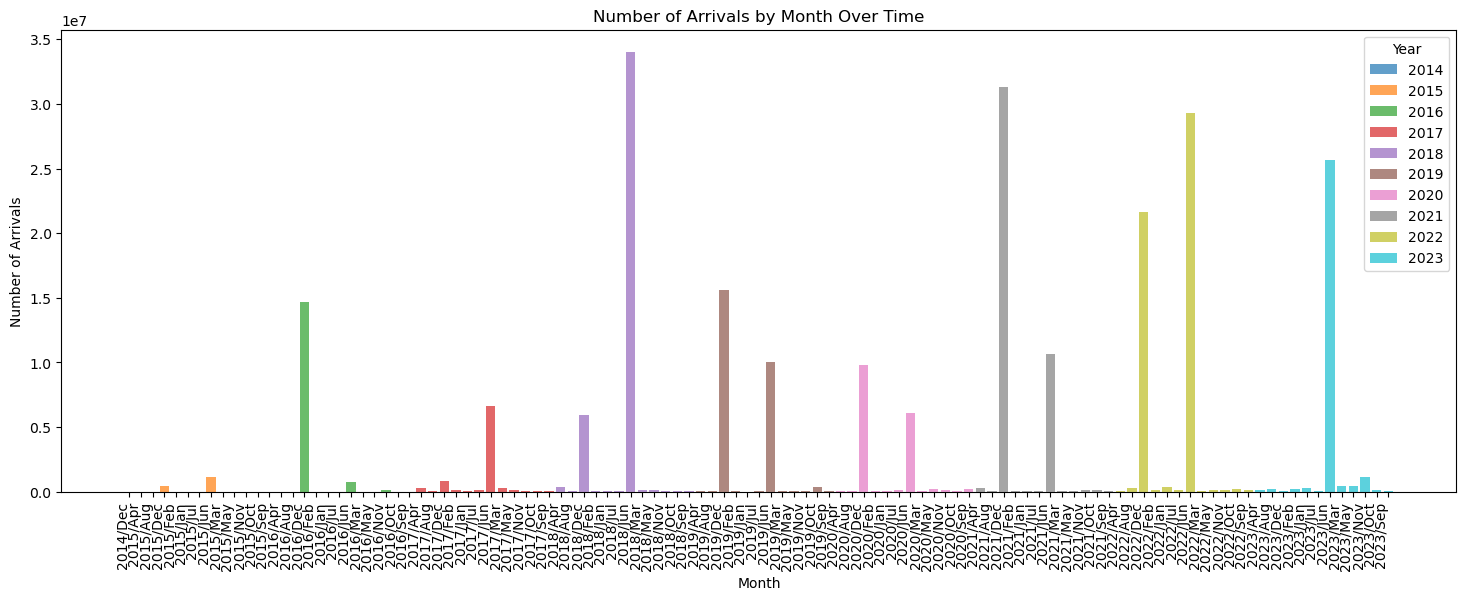

In [47]:
import matplotlib.pyplot as plt
counts = df.groupby(['Year', 'Month'])['Arrivals'].sum().reset_index()
# Set figure size
plt.figure(figsize=(18, 6))

# Combine year and month to create a new column for x-axis
counts['Year-Month'] = counts['Year'].astype(str) + '/' + counts['Month'].astype(str)

# Set x-axis ticks and labels
x_ticks = counts['Year-Month'].unique()
x_labels = counts['Month'].unique()

# Loop through each year and plot the number of orders as bars
for year in counts['Year'].unique():
    year_data = counts[counts['Year'] == year]
    plt.bar(year_data['Year-Month'], year_data['Arrivals'], label=str(year), alpha=0.7)

# Set x-axis ticks and labels
plt.xticks(ticks=range(len(x_ticks)))

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Number of Arrivals')
plt.title('Number of Arrivals by Month Over Time')
plt.legend(title='Year')

Here, we see that a lot of people move in June and that throughout each year we see ths cyclical nature.

0     2014-12-01
1     2015-04-01
2     2015-08-01
3     2015-12-01
4     2015-02-01
         ...    
104   2023-03-01
105   2023-05-01
106   2023-11-01
107   2023-10-01
108   2023-09-01
Name: Year-Month, Length: 109, dtype: datetime64[ns] 0            0.0
1         4651.0
2         5448.0
3       471040.0
4         2940.0
         ...    
104     404640.0
105     450615.0
106    1177460.0
107     124390.0
108      60965.0
Name: Arrivals, Length: 109, dtype: float64


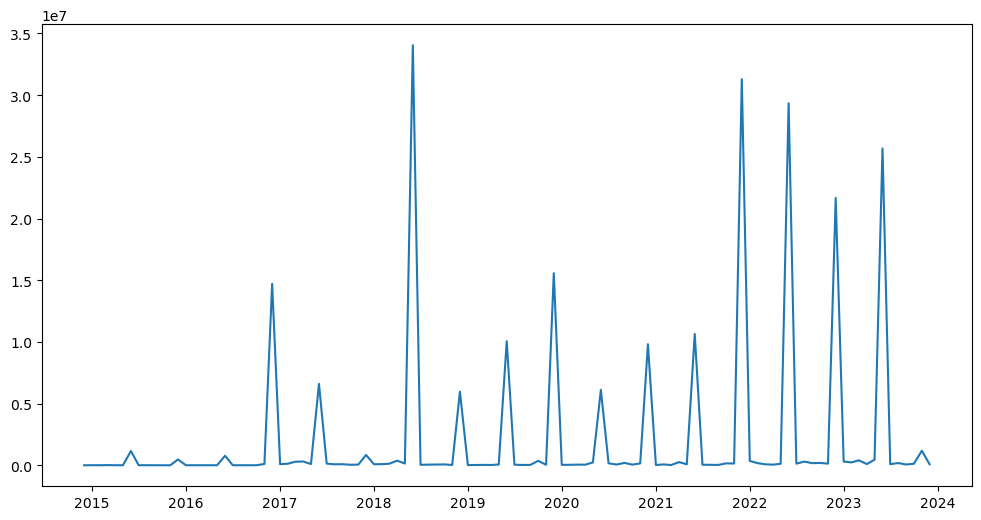

In [66]:
print(counts['Year-Month'], counts['Arrivals'])

# Convert the "Year-Month" column to datetime format
counts['Year-Month'] = pd.to_datetime(counts['Year-Month'], format='%Y-%B')

# Sort the DataFrame by the "Year-Month" column
order_counts_sorted = counts.sort_values('Year-Month')
# Set figure size
plt.figure(figsize=(12, 6))

# Plot the bar plot
plt.plot(order_counts_sorted['Year-Month'], order_counts_sorted['Arrivals'])


In [71]:
# build our best model
train, test = train_test_split(df_dropna_t9, test_size=0.2)
X_train = train.drop(['Arrivals'], axis=1)
y_train = train[['Arrivals']]
X_test = test.drop(['Arrivals'], axis=1)
y_test = test[['Arrivals']]

DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)

preds = DT.predict((X_test))
y_true = y_test.values.flatten()
diffs = preds - y_true

print(f'percent of perfect predictions: {(np.count_nonzero(diffs == 0) / len(diffs))}')

percent of perfect predictions: 0.9790010036285031


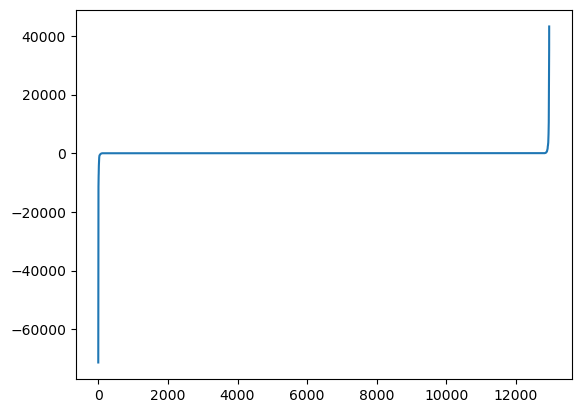

In [72]:
# plot of differences
plt.plot(np.sort(diffs))

In [ ]:
# plot only the differences greater than 1000
preds = RF.predict((X_test))

bins = np.arange(0, max(diffs), 10000)
plt.hist(diffs[diffs > 1000], bins=bins, edgecolor='black')

# Add labels and title
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.title('Histogram of Differences')

# Conclusion

In conclusion, we found that the sub dataset that dropped NA values as opposed to imputing was the most accurate. The most likely cause for this is that the data is overfit, due to only have 275 rows left after removing rows with NA values with all of the features: 

In [16]:
print("# rows after dropping NA values (all features):",df_dropna.shape[0])
print("# rows after imputing (all features):",df_impute.shape[0])


# rows after dropping NA values (all features): 275
# rows after imputing (all features): 328856


This is a dramatic decrease from the 328,856 rows in our original dataset and after imputing with all features. While removing NA values may ensure all of the data is from the original source, the decrease in rows also runs the risk of overfitting.

The imputed data also proved to be fairly accurate for the three models. Linear Regression, like with other datasets was fairly low with 68% accuracy, but this proved to be higher than any other dataset.

The imputed data did have a side-effect of producing negative values, which is impossible given our target (Arrivals) cannot be negative: 

In [20]:
print(f"percent of imputed arrival data that is negative: {count_negative(df_impute['Arrivals'])/ len(y_train['Arrivals']) * 100}")

percent of imputed arrival data that is negative: 16.29023429779082


We think the dropNA top 9 is the best, since it performs the best and is unlikely to be overfit and also doesn't have the weird negative values. The best model on this dataset was a decision tree -> reiterate this models scores

With this understanding of imputing and overfitting in mind, overall, the most accurate dataset is when we dropped the NA values after only maintaining the "top 9" features recommended by the UNCHR in their challenge: Region, District, Month, Year, rainfall, Conflict Fatalities, Conflict Incidents, Water Price, Goat Price. According to the UN, these features are most supported throughout our time frame and provide the best ability to predict the amount of arrivals. By reducing the amount of features, we were able to prevent overfitting by maintaining more rows. This dataset also has the advantage of having no negative values as a side effect of imputing:

In [21]:
print("# rows after dropping NA values (top 9 features):",df_dropna_t9.shape[0])



# rows after dropping NA values (top 9 features): 64765


#### The accuracies for dropping NA values with 9 features:

##### Linear Regression:
Accuracy: 46%
Score (r^2): 0.02
##### Decision Tree Regressor: 
Accuracy: 99%
Score (r^2): 0.87
##### Random Forest:
Accuracy: 99%
Score (r^2): 89

The Random Forest Regressor with the dataset that drops NA values with the top 9 features has the highest score and accuracy for any model.

Overall, by exploring these different datasets, methods of data cleaning and models, we were able to understand how accuracy measurements can be misleading due to overfitting and how outstanding factors in data collection can ultimately sway models. 



OTHER STUFF:

e do very well on almost all predictions (perfectly predict 98(check this)% of the time) but we fuck up bad on the few large predictions. 
If these were anomolies that we dont expect to get right (i.e. there was some external factor not present in our data that caused them), then no problem
If we want to get these right (i.e. they were caused by the factors we have in our dataset alone - rain, market prices, etc.), then we should try to to tell our model the make bolder predictions in some way